# Investigating unadjusted p-values from 0ppm vs 1500ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 28, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the normalized expression differences between 1500ppm and 0ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/0ppm_vs_1500ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/0ppm_vs_1500ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/0ppm_vs_1500ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

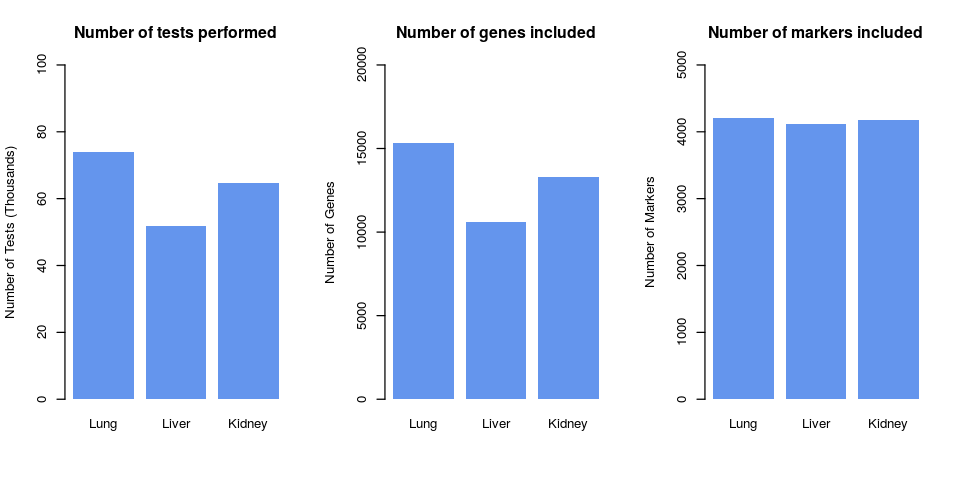

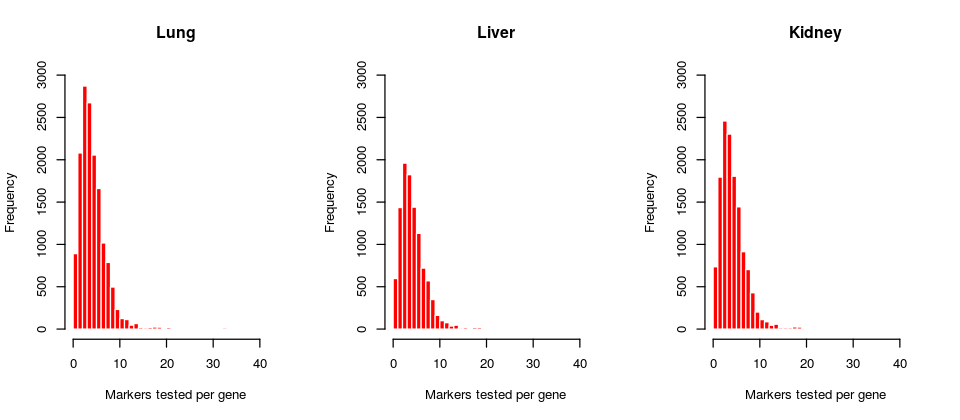

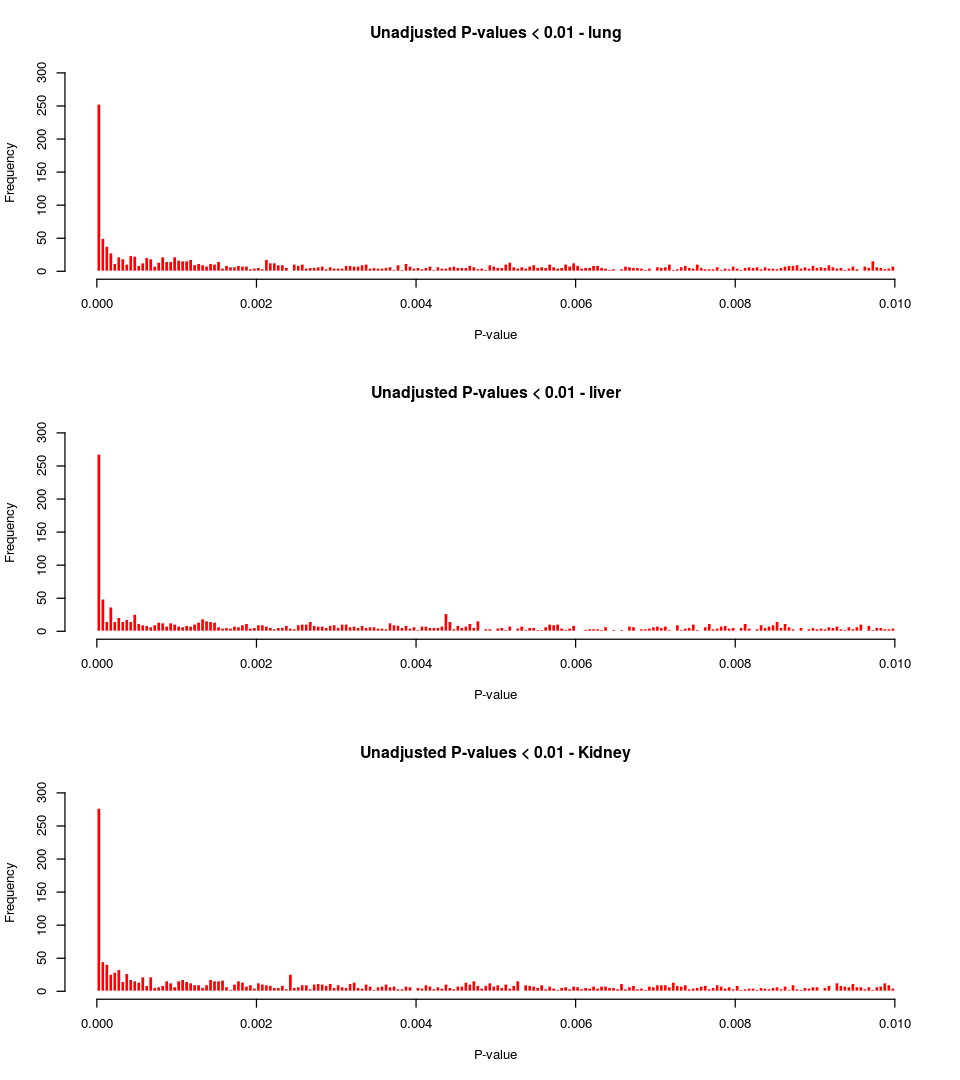

In [6]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [7]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/0ppm_vs_1500ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/0ppm_vs_1500ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/0ppm_vs_1500ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [9]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_0_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene      Marker                               P-value             
1   Surf1     JAX00485655.UNC2769505               7.0875402534558e-40 
2   Surf1     UNC2761572.JAX00092339               7.37212788810434e-40
3   Surf1     UNC2765102.UNC2767477                7.37232711787554e-40
4   Wnt2b     UNC5891025.UNC5917724                1.4361173497377e-26 
5   Ppp1r14b  JAX00469668.UNC29855954              1.07689971606189e-23
6   Ppp1r14b  UNC29856661.UNC29864970              1.19398851512311e-23
7   Ppp1r14b  UNC29865283.UNC29865283              1.2130466452599e-23 
8   C8g       UNC2746803.UNC2747334                4.15053634218209e-20
9   Styxl1    UNC10243742.UNC10244171              3.28969683604536e-15
10  Styxl1    UNC10239614.JAX00598489              3.81494208843484e-15
11  Ly6f      UNC25888851.UNC25895704              1.31844245393028e-14
12  Ly6f      UNC25896223.UNC25904367              1.39007505333876e-14
13  Styxl1    JAX00136067.UNC10236173              1.46976147182673e-14
14  Styxl1    UNC10244622.UNC10246662              1.54209582857316e-14
15  Cyp2j6    UNC7800165.UNC7802608                3.28353763512908e-14
16  Cyp2j6    UNC7778493.UNC7800092                3.41525520158413e-14
17  Wnt2b     UNC5888495.UNC030164357              1.18381620802326e-12
18  Serpinb6c backupJAX00354324.JAX00354524        3.64783103055703e-12
19  Serpinb6c UNC22378305.JAX00354323              3.8056688560786e-12 
20  Serpinb6c UNC22394212.UNC22409068              3.89422439710873e-12
21  Serpinb6c UNC22370249.UNC22378085              4.19271829571004e-12
22  Srrm2     JAX00433060.B6_17_023744030_S        8.38004959998946e-12
23  Cyp2b13   UNC12521588.UNC12531236              1.71774881645307e-11
24  Cyp2b13   UNC12521377.UNC12521377              3.0363138850851e-11 
25  Mb21d2    UNC26532657.UNC26542096              5.91970446200899e-11
26  Mb21d2    UNC26542724.UNC26558846              6.27453519888434e-11
27  Mb21d2    JAX00416731.UNC26559231              1.21042680930238e-10
28  Mb21d2    JAX00067795.UNC26565530              1.30218456396414e-10
29  H60c      B6_10_004862788_S.backupUNC100008688 2.08404682929391e-10
30  Asphd1    UNC13808080.UNC13808351              4.16631604064618e-10
⋮   ⋮         ⋮                                    ⋮                   
71  H60c      JAX00014634.UNC17374593              1.47149123273364e-08
72  Adamdec1  UNC24171088.UNC24176426              1.64345818043171e-08
73  Cbr3      UNC27419473.UNC27424733              1.70199864039454e-08
74  Kng2      UNC26469272.UNC26472626              1.84783251826123e-08
75  Kng2      JAX00415604.JAX00415604              2.02157751335108e-08
76  Kng2      JAX00415607.UNC26468332              2.02265400744884e-08
77  Adamdec1  UNC24154965.UNC24170250              2.02425439609799e-08
78  H60c      CEAJAX00014673.UNC17387979           2.22812707986247e-08
79  Cdc25c    UNC29006931.UNC29022978              2.44695120267794e-08
80  Cdc25c    UNC29023372.UNC29023821              2.57613821895404e-08
81  Cdc25c    UNC29023900.UNC29023900              3.05072925245385e-08
82  Snx4      UNC160035995.UNC26602350             4.07362329149042e-08
83  Snx4      UNC160202433.UNC160203517            4.09922872663187e-08
84  Anxa8     UNC23825504.UNC23826071              5.60981786341924e-08
85  Anxa8     UNC23826331.UNC23826890              5.61542751883026e-08
86  Anxa8     backupUNC140121600.UNC23831316       5.63263064396329e-08
87  Snx4      UNC26611901.UNC26632751              5.70898528590631e-08
88  Anxa8     UNC23831510.UNC23861847              5.71491277655235e-08
89  Snx4      UNC26606735.UNC160297022             5.8124731000353e-08 
90  Cbr3      UNC27408782.UNC27418159              6.13954980328336e-08
91  Cbr3      UNC27408716.UNC27408716              8.28038725206708e-08
92  Anxa8     UNC23825187.UNC23825187              8.88211854229607e-08
93  Anxa8     UNC23824974.UNC23824974              9.26445429344559e-08
94  Opn3      UNC2222461.UNC2252169         

Liver


Gene          Marker                        P-value              
1   Slc22a28      UNC29870993.UNC29871077       7.85436238705191e-125
2   Slc22a28      UNC29870891.UNC29870891       8.53070535981168e-125
3   Slc22a28      UNC29870739.UNC29870739       9.02598466891616e-125
4   Slc22a28      UNC29870591.UNC29870591       9.56354669824846e-125
5   Slc22a28      UNC29870437.UNC29870437       1.01446790935915e-124
6   Slc22a28      UNC29870343.UNC29870343       1.07724286097134e-124
7   Slc22a28      UNC29870238.UNC29870238       1.14500338446832e-124
8   Slc22a28      UNC29870159.UNC29870159       1.21809311678387e-124
9   Slc22a28      JAX00086716.JAX00086716       1.29687597408574e-124
10  Slc22a28      UNC29870082.UNC29870082       1.38173674092837e-124
11  Slc22a28      UNC29869483.UNC29869587       1.976731650974e-124  
12  Slc22a28      UNC29869312.UNC29869312       2.18362805657593e-124
13  Slc22a28      UNC29869217.UNC29869217       2.33281002046699e-124
14  Slc22a28      JAX00469956.UNC29869053       2.84850371462242e-124
15  Slc22a28      UNC29867469.UNC29867469       3.47601298956508e-124
16  Rad51         UNC3827172.UNC020151798       1.04085584401019e-84 
17  Slc22a28      UNC29871907.JAX00470030       1.24746037529982e-73 
18  Slc22a28      UNC29871593.UNC29871593       1.38752316186663e-73 
19  Slc22a28      UNC29871426.UNC29871426       1.43219110967587e-73 
20  Slc22a28      UNC29871338.UNC29871338       1.48084830839086e-73 
21  Slc22a28      UNC29871139.UNC29871202       1.56105565427503e-73 
22  Slc22a28      UNC29869670.UNC29869670       3.15305580020646e-73 
23  Pygm          JAX00469668.UNC29855954       1.99715681916514e-57 
24  Pygm          UNC29856661.UNC29864970       2.0880273920042e-57  
25  Tff3          UNC27753023.UNC27767093       8.3068469869998e-57  
26  Ppard         UNC27722618.UNC27722769       6.48399119488576e-56 
27  Ppard         UNC27722978.UNC27723391       7.51009592573589e-56 
28  Ppard         UNC27715265.JAX00434785       8.78069461410622e-56 
29  Mir6340       UNC4531549.UNC4536733         1.14234219778609e-48 
30  Mir6340       UNC4540460.UNC4545629         5.1585900174408e-47  
⋮   ⋮             ⋮                             ⋮                    
71  Ren1          UNC1685599.backupUNC010608551 2.66924363527683e-10 
72  Mgst2         UNC5241131.UNC5241131         2.94972674057696e-10 
73  Snord32a      UNC12730093.UNC12733421       6.01888826581059e-10 
74  Snord32a      UNC12733892.UNC12750077       7.18543168331706e-10 
75  Myl2          UNC10027431.UNC050201332      1.00635428306097e-09 
76  Asic5         UNC5634552.JAX00527982        1.94795804141046e-09 
77  Egr1          UNC29023900.UNC29023900       2.25649794547749e-09 
78  Egr1          UNC29023372.UNC29023821       2.31034729658852e-09 
79  Egr1          UNC29006931.UNC29022978       2.36240456190097e-09 
80  Asic5         JAX00109616.JAX00528118       3.17198103553794e-09 
81  Asic5         UNC5649037.UNC5663586         3.17825889558052e-09 
82  Asic5         UNC5637994.UNC5646492         3.20361707688115e-09 
83  Zfand2a       UNC10291007.UNC10306321       3.64388867178419e-09 
84  Ren1          UNC1707230.UNC1707230         4.09261721155852e-09 
85  Asic5         JAX00109485.UNC5633281        5.52862486119174e-09 
86  St3gal6       UNC26905719.UNC26908264       5.88267479870839e-09 
87  Ankrd37       JAX00667456.UNC14665833       6.31201759384407e-09 
88  Arl14ep       JAX00498115.UNC3707191        7.72177172130933e-09 
89  Arl14ep       UNC3707278.UNC3732390         9.6948259729814e-09  
90  Ren1          UNC1715756.UNC1721981         1.04791111817601e-08 
91  Gstt3         JAX00019727.JAX00019795       1.11927437536095e-08 
92  Ren1          UNC1708282.JAX00009765        1.17568694775567e-08 
93  9430037G07Rik UNC090178541.UNC16883357      1.79913760338742e-08 
94  9430037G07Rik UNC16814383.UNC16822579       1.82123510383578e-08 
95  Ankrd37       UNC14643393.UNC14648074       2.1067976935874e-08  
96  Ankrd37   

Kidney


Gene          Marker                         P-value             
1   Mir505        UNC30857253.JAX00179625        1.99017655332252e-48
2   Fam184b       UNC9095564.UNC9097196          4.74229923625112e-32
3   Mir505        UNC30875720.JAX00239166        7.90891165002021e-32
4   Rell1         UNC9252175.UNC9339990          7.57699736923947e-25
5   Gstp3         UNC29827168.UNC29827168        1.26318271752237e-20
6   Gstp3         UNC29827681.UNC29829291        1.27795390322001e-20
7   Gstp3         JAX00469067.JAX00469067        1.29287829640095e-20
8   Gstp3         JAX00469069.JAX00469069        1.29892096827322e-20
9   Gstp3         JAX00469079.JAX00469079        1.30500269311343e-20
10  Gstp3         JAX00469261.UNC29853003        1.30754707624733e-20
11  Gstp3         UNC29830560.UNC29830560        1.31112123324819e-20
12  Gstp3         UNC29831148.UNC29831148        1.31727503301148e-20
13  Gstp3         JAX00469121.UNC29832780        1.33280043683609e-20
14  Gstp3         UNC29833061.JAX00469178        1.35166116069367e-20
15  Gstp3         UNC29834230.UNC29835726        1.36752956748905e-20
16  Gstp3         UNC29836189.UNC29836189        1.38029717851035e-20
17  Gstp3         JAX00086422.JAX00086422        1.38669887455498e-20
18  C230035I16Rik UNC22267867.UNC22282237        2.82669483083449e-20
19  Pdilt         UNC13709012.UNC13719930        1.49664911697604e-19
20  Kif5b         UNC180001402.JAX00080058       2.5563619786499e-17 
21  Pgm1          UNC9252175.UNC9339990          6.58250733256421e-14
22  Gstp3         JAX00468987.JAX00468987        3.04932748298252e-12
23  Mir505        backupJAX00712427.JAX00179923  4.72414768979177e-12
24  2310034O05Rik UNC9768856.UNC9769129          6.27557202951883e-12
25  2310034O05Rik UNC9770117.JAX00589809         6.28290173860116e-12
26  2310034O05Rik UNC9778806.UNC9792580          6.28941472749845e-12
27  2310034O05Rik JAX00589558.UNC9767715         1.57058505220325e-11
28  Ces2h         UNC15417874.UNC15422538        4.36356886542837e-11
29  Ces2h         UNC15422872.UNC15444168        4.44775068435996e-11
30  Blvrb         UNC12521588.UNC12531236        2.01750689377609e-10
⋮   ⋮             ⋮                              ⋮                   
71  Syne3         UNC21786756.UNC21787709        1.0827653283391e-07 
72  Xpc           UNC11573810.backupUNC061302634 1.08348730401126e-07
73  Rdh13         UNC12381586.UNC12381586        1.13045783175792e-07
74  Mrps25        UNC11597897.UNC11597897        1.13054314735629e-07
75  Fhod1         UNC15422872.UNC15444168        1.14381697408325e-07
76  Xpc           UNC11585091.UNC11586368        1.16365583871346e-07
77  Xpc           UNC11587267.UNC11597890        1.20899299822483e-07
78  Spink6        UNC180270327.UNC29165311       1.23223590688309e-07
79  Spink6        UNC29148462.UNC29160709        1.23447831224633e-07
80  Spink6        UNC29147760.UNC29147760        1.23651354947024e-07
81  Mab21l3       UNC5856401.JAX00532122         1.40828870960218e-07
82  Rdh13         UNC12380978.UNC12380978        1.46209281500685e-07
83  Ankrd37       UNC14627527.JAX00667400        1.52419430543697e-07
84  Mrps25        UNC11587267.UNC11597890        1.57180658531463e-07
85  Mrps25        UNC11573810.backupUNC061302634 1.57598586299958e-07
86  Mrps25        UNC11585091.UNC11586368        1.59200762968106e-07
87  Mab21l3       UNC5843674.UNC5856067          1.60258899010708e-07
88  Ankrd37       UNC14643393.UNC14648074        1.81710964558708e-07
89  Ankrd37       JAX00667456.UNC14665833        2.51513338678474e-07
90  Mab21l3       UNC5861614.UNC5867432          3.34880842840697e-07
91  Gm867         UNC18245269.UNC18248787        3.70513733843697e-07
92  Gm867         UNC18201974.UNC18243811        3.96160287870813e-07
93  Mab21l3       UNC5868462.UNC5874607          4.23439654251977e-07
94  Pcnx4         UNC21363333.JAX00337452        4.72629993068078e-07
95  Pcnx4         JAX00337455.JAX00337455        4.8649250069567e-07 
96  Slco1a4   